In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
dtypes = {'id':'uint32', 'item_nbr':'int32', 'store_nbr':'int8', 'unit_sales':'float32'}

dtypes

{'id': 'uint32',
 'item_nbr': 'int32',
 'store_nbr': 'int8',
 'unit_sales': 'float32'}

In [3]:
train = pd.read_csv("train.csv", usecols= [1,2,3,4], dtype = dtypes, parse_dates = ["date"])

In [4]:
train1 = train

In [5]:
train1.head()

,date,store_nbr,item_nbr,unit_sales
0,2013-01-01,25,103665,7.0
1,2013-01-01,25,105574,1.0
2,2013-01-01,25,105575,2.0
3,2013-01-01,25,108079,1.0
4,2013-01-01,25,108701,1.0


In [6]:
train1.tail()

,date,store_nbr,item_nbr,unit_sales
1048570,2013-01-27,48,956013,31.0
1048571,2013-01-27,48,956014,57.0
1048572,2013-01-27,48,957096,6.0
1048573,2013-01-27,48,957098,4.0
1048574,2013-01-27,48,958514,6.0


In [7]:
train1.dtypes

date          datetime64[ns]
store_nbr               int8
item_nbr               int32
unit_sales           float32
dtype: object

In [8]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
date          1048575 non-null datetime64[ns]
store_nbr     1048575 non-null int8
item_nbr      1048575 non-null int32
unit_sales    1048575 non-null float32
dtypes: datetime64[ns](1), float32(1), int32(1), int8(1)
memory usage: 17.0 MB


In [9]:
train1.describe(include="all")

,date,store_nbr,item_nbr,unit_sales
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06
unique,27,NaN,NaN,NaN
top,2013-01-19 00:00:00,NaN,NaN,NaN
freq,43416,NaN,NaN,NaN
first,2013-01-01 00:00:00,NaN,NaN,NaN
last,2013-12-01 00:00:00,NaN,NaN,NaN
mean,NaN,2.648310e+01,6.177409e+05,8.750816e+00
std,NaN,1.648729e+01,3.035138e+05,1.971548e+01
min,NaN,1.000000e+00,9.699500e+04,-1.680000e+02
25%,NaN,1.000000e+01,3.580960e+05,2.000000e+00


In [10]:
train1.loc[(train.unit_sales<0),'unit_sales'] = 0 # eliminate negatives

In [11]:
train1.head()

,date,store_nbr,item_nbr,unit_sales
0,2013-01-01,25,103665,7.0
1,2013-01-01,25,105574,1.0
2,2013-01-01,25,105575,2.0
3,2013-01-01,25,108079,1.0
4,2013-01-01,25,108701,1.0


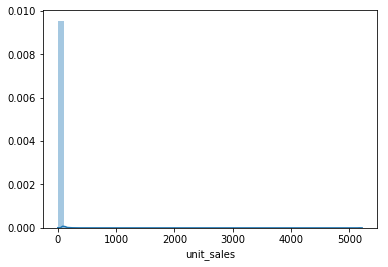

In [12]:
sns.distplot(train1["unit_sales"])

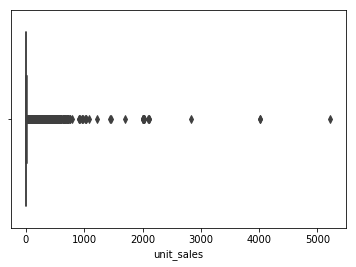

In [13]:
sns.boxplot(train1["unit_sales"])

In [14]:
train1['unit_sales'] =  train1['unit_sales'].apply(pd.np.log1p) #logarithm conversion

In [15]:
train1.head()

,date,store_nbr,item_nbr,unit_sales
0,2013-01-01,25,103665,2.079442
1,2013-01-01,25,105574,0.693147
2,2013-01-01,25,105575,1.098612
3,2013-01-01,25,108079,0.693147
4,2013-01-01,25,108701,0.693147


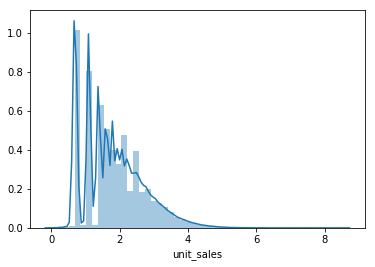

In [16]:
sns.distplot(train1["unit_sales"])

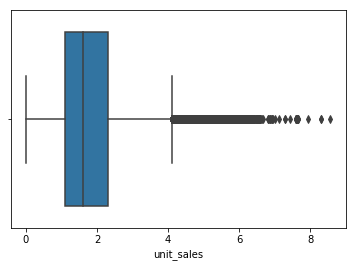

In [17]:
sns.boxplot(train1["unit_sales"])

In [18]:
train1['dow'] = train1['date'].dt.dayofweek

In [19]:
train1.head()

,date,store_nbr,item_nbr,unit_sales,dow
0,2013-01-01,25,103665,2.079442,1
1,2013-01-01,25,105574,0.693147,1
2,2013-01-01,25,105575,1.098612,1
3,2013-01-01,25,108079,0.693147,1
4,2013-01-01,25,108701,0.693147,1


In [20]:
train1.tail()

,date,store_nbr,item_nbr,unit_sales,dow
1048570,2013-01-27,48,956013,3.465736,6
1048571,2013-01-27,48,956014,4.060443,6
1048572,2013-01-27,48,957096,1.945910,6
1048573,2013-01-27,48,957098,1.609438,6
1048574,2013-01-27,48,958514,1.945910,6


In [21]:
ma_dw = train[['item_nbr','store_nbr','dow','unit_sales']].groupby(
        ['item_nbr','store_nbr','dow'])['unit_sales'].mean().to_frame('madw').reset_index()

In [22]:
ma_dw.head()

,item_nbr,store_nbr,dow,madw
0,96995,1,0,0.693147
1,96995,1,1,0.693147
2,96995,1,4,0.828302
3,96995,2,0,0.895880
4,96995,2,1,1.194506


In [23]:
ma_wk = ma_dw[['item_nbr','store_nbr','madw']].groupby(
        ['store_nbr', 'item_nbr'])['madw'].mean().to_frame('mawk').reset_index()

In [24]:
ma_wk.head()

,store_nbr,item_nbr,mawk
0,1,96995,0.738199
1,1,103520,1.269834
2,1,103665,1.416400
3,1,105574,1.683677
4,1,105575,2.082624


In [25]:
train1.drop('dow',1,inplace=True)

In [26]:
train1.head()

,date,store_nbr,item_nbr,unit_sales
0,2013-01-01,25,103665,2.079442
1,2013-01-01,25,105574,0.693147
2,2013-01-01,25,105575,1.098612
3,2013-01-01,25,108079,0.693147
4,2013-01-01,25,108701,0.693147


In [27]:
u_dates = train1.date.unique()
u_stores = train.store_nbr.unique()
u_items = train.item_nbr.unique()
train1.set_index(['date', 'store_nbr', 'item_nbr'], inplace=True)

In [28]:
train1.head()

unit_sales
date       store_nbr item_nbr            
2013-01-01 25        103665      2.079442
                     105574      0.693147
                     105575      1.098612
                     108079      0.693147
                     108701      0.693147

In [31]:
train1 = train1.reindex(
    pd.MultiIndex.from_product(
        (u_dates, u_stores, u_items),
        names=['date','store_nbr','item_nbr']
    )
).reset_index()

ValueError: cannot insert item_nbr, already exists

In [32]:
train1.head()

,date,store_nbr,item_nbr,unit_sales
0,2013-01-01,25,103665,2.079442
1,2013-01-01,25,105574,0.693147
2,2013-01-01,25,105575,1.098612
3,2013-01-01,25,108079,0.693147
4,2013-01-01,25,108701,0.693147


In [33]:
del u_dates, u_stores, u_items

In [34]:
train1.loc[:, 'unit_sales'].fillna(0, inplace=True) # fill NaNs

In [35]:
train1.head()

,date,store_nbr,item_nbr,unit_sales
0,2013-01-01,25,103665,2.079442
1,2013-01-01,25,105574,0.693147
2,2013-01-01,25,105575,1.098612
3,2013-01-01,25,108079,0.693147
4,2013-01-01,25,108701,0.693147


In [36]:
lastdate = train1.iloc[train1.shape[0]-1].date
lastdate

Timestamp('2013-01-27 00:00:00')

In [37]:
#Moving Averages
ma_is = train1[['item_nbr','store_nbr','unit_sales']].groupby(
        ['item_nbr','store_nbr'])['unit_sales'].mean().to_frame('mais')

In [38]:
ma_is.head()

mais
item_nbr store_nbr          
96995    1          0.169050
         2          0.522167
         3          0.143378
         4          0.327445
         5          0.051344

In [39]:
for i in [112,56,28,14,7,3,1]:
    tmp = train1[train1.date>lastdate-timedelta(int(i))]
    tmpg = tmp.groupby(['item_nbr','store_nbr'])['unit_sales'].mean().to_frame('mais'+str(i))
    ma_is = ma_is.join(tmpg, how='left')

In [40]:
del tmp,tmpg,train

In [41]:
ma_is['mais']=ma_is.median(axis=1)
ma_is.reset_index(inplace=True)
ma_is.drop(list(ma_is.columns.values)[3:],1,inplace=True)

In [42]:
#Load test
test = pd.read_csv('test.csv', dtype=dtypes, parse_dates=['date'])
test['dow'] = test['date'].dt.dayofweek
test = pd.merge(test, ma_is, how='left', on=['item_nbr','store_nbr'])
test = pd.merge(test, ma_wk, how='left', on=['item_nbr','store_nbr'])
test = pd.merge(test, ma_dw, how='left', on=['item_nbr','store_nbr','dow'])

In [43]:
del ma_is, ma_wk, ma_dw

In [44]:
#Forecasting Test
test['unit_sales'] = test.mais 
pos_idx = test['mawk'] > 0
test_pos = test.loc[pos_idx]
test.loc[pos_idx, 'unit_sales'] = test_pos['mais'] * test_pos['madw'] / test_pos['mawk']
test.loc[:, "unit_sales"].fillna(0, inplace=True)
test['unit_sales'] = test['unit_sales'].apply(pd.np.expm1) # restoring unit values 

In [45]:
#50% more for promotion items
test.loc[test['onpromotion'] == True, 'unit_sales'] *= 1.5

In [48]:
test[['id','unit_sales']].to_csv('TS1_Output.csv')